# Aubry-Andre-Harper model

Saumya Biswas (saumyab@uoregon.edu)

The 1d Aubry-Andre model(also known as the Harper model) is a 1d tight binding model with a on-site potential that is oscillating with an irrational wavelength. Following Ref [1], we choose the frequency to be the Golden ratio $(\frac{1+\sqrt{5}}{2})$

\begin{equation}
H(\phi) \psi_n = t(\psi_{n-1}+\psi_{n+1}) + \lambda cos(2\pi b n + \phi)
\end{equation}

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lamda = 0.5
b = (np.sqrt(5)+1)/2
xn = np.arange(-49, 50)
n_phi = 100

In [3]:
site_chain = Lattice1d(num_cell=99, boundary = "aperiodic")
tb_Hamil = site_chain.Hamiltonian()
dimH = tb_Hamil.dims

In [4]:
Vs = np.zeros((len(xn), n_phi))
for i in range(n_phi):
    phi = i * (2 * np.pi)/n_phi
    onsite_potential = np.diag(lamda * np.cos(2 * np.pi * b * xn + phi) )    
    AA_Hamiltonian = tb_Hamil + Qobj(onsite_potential, dims=dimH)  # Making the dims of onsite_potential
                                                # compatible with the tb_Hamil
    [D, V] = AA_Hamiltonian.eigenstates()
    Vs[:, i] = D

In [5]:
phiA = np.arange(0,n_phi)/n_phi * 2 * np.pi

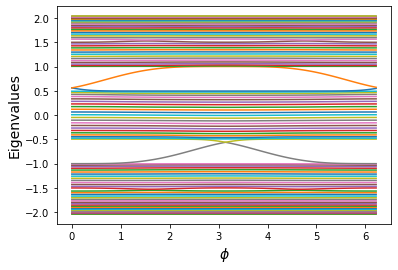

In [6]:
for i in range(len(xn)):
    plt.plot(phiA, Vs[i, :])
plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel('Eigenvalues', fontsize=14)
plt.show()
plt.close()

We can pick one of the edge states to investigate them more closely. For example, we could choose to investigate the 38th($Vs[37, :]$) and 39th($Vs[38, :]$) eigenstate.

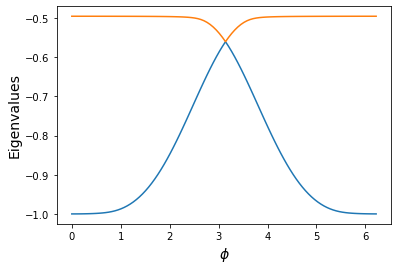

In [7]:
plt.plot(phiA, Vs[37, :])
plt.plot(phiA, Vs[38, :])
plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel('Eigenvalues', fontsize=14)
plt.show()
plt.close()

We now plot the eigenvector corresponding to edge-state $Vs[37, 60]$

In [8]:
phi = 60 * (2 * np.pi)/n_phi
onsite_potential = np.diag(lamda * np.cos(2 * np.pi * b * xn + phi) )    
AA_Hamiltonian = tb_Hamil + Qobj(onsite_potential, dims=dimH)  # Making the dims of onsite_potential
                                                # compatible with the tb_Hamil
[D, V] = AA_Hamiltonian.eigenstates()

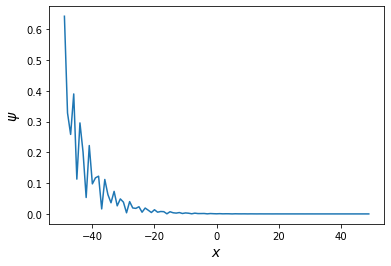

In [10]:
plt.plot(xn, np.abs(V[37].full()) )
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\psi$', fontsize=14)
plt.show()
plt.close()

Unsurprisingly, for the value of $\phi$, the eigenvector is localized close to the edge.

### References
[1] Kraus, Y. E., Lahini, Y., Ringel, Z., Verbin, M., & Zilberberg, O. (2012). Topological states and adiabatic pumping in quasicrystals. Physical review letters, 109(10), 106402.

In [97]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0.dev0+c8074e5
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Aug5/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [96]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
